<a href="https://colab.research.google.com/github/rosh4github/eportfolio/blob/main/Unit06_K_Means_demo_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:

Unit 6 - Machine Learning module - University of Essex Online (2024)

Gemini (2024) Gemini response to Roshni Kasturi. 1 November.

## Introduction





### Import libraries


In [ ]:
# random library
import random

# numerical computing
import numpy as np
import matplotlib.pyplot as plt
# sklearn library, cluster module within the library (tools for clustering tasks), KMeans class (specific clustering algorithm for partitioning data into clusters based on similarity)
from sklearn.cluster import KMeans

# magic command specific to Jupyter Notebooks
# instructs notebook to display plots directly within the notebook output cells instead of separate windows
%matplotlib inline

# Customer Segmentation with K-Means
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.



### Load Data From CSV File  
Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.

In [ ]:
import pandas as pd

cust_df = pd.read_csv("/content/Cust_Segmentation.csv.xls")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [ ]:
# method = function attached to an object [.drop() is a method]
# axis=1 specifies dropping of a column (axis=0 for rows)
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __standardScaler()__ to normalize our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler #tool in the sklearn.preprocessing module used to normalize data / put all data on the same scale
X = df.values[:,1:] #removing very first column, customer ID, as it may not be relevant for clustering
X = np.nan_to_num(X) #handles any missing values (NaN = Not a Number) in data; replaces NaN values with zero - making data clean for StandardScaler

# Normalization
# StandardScaler() creates a standardscaler object
# fit_transform does 2 things:
# 1. fit = calculates mean & std of each feature (column) in X
# 2. transform = uses ^ to scale the data. Centers the data around 0 (by subtracting the mean) & scales it to have a std=1 (by dividing the std)
Clus_dataSet = StandardScaler().fit_transform(X)

#normalized dataset for clustering
#same data as X, but w/all features adjusted to a comparable scale
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modeling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [ ]:
# Clustering

from sklearn.cluster import KMeans #class - which is an algorithm (groups similar customers together based on their features)
clusterNum = 3

# init = "k-means++" - specifies the method used to initialize the cluster centers. "k-means++ is a smart initialization technique that helps the algorithm converge faster and potentially find better clusters compared to random initialization (Gemini, 2024).
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12) #n_init - "This parameter controls how many times the K-Means algorithm will run with different initial centroids. The algorithm will keep the best result (the one with the lowest inertia - a measure of how spread out the clusters are) out of these 12 runs (Gemini, 2024)."

#Fitting

k_means.fit(X) #fit() method applies K-Means algo to X; finds optimal cluster centers and assigns each customer to the nearest cluster

labels = k_means.labels_ #contains an array where each element represents cluster assignment for a corresponding customer. labels[0] = 1 means that the 1st customer in X belongs to cluster 1
print(labels) #prints cluster assignments for all customers

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

### Insights
We assign the labels to each row in dataframe.

In [ ]:
# creates a new column named clus_km in df [overwritten if it already exists]
# labels - holds the cluster assignments generated by the K-Means algorithm (array wherein each element corresponds to a customer and indicates their cluster #)
# labels data assigned to this new column
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


We can easily check the centroid values by averaging the features in each cluster.

In [ ]:
# groups the data in df based on cluster values
# mean() calculates average value for each numerical column within each group/cluster
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


Now, lets look at the distribution of customers based on their age and income:

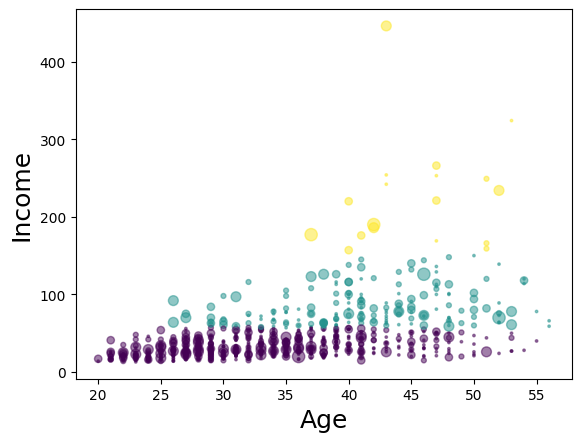

In [ ]:
# calculates the area of circles to be used for representing data points on the scatter plot
# X[:,1] selects all rows and 1st index (second column - Education) from X (dataset after preprocessing)
# **2 squares the education values to get the area proportional to customer's education
# education value = radius herein = third dimension for representation / insights
area = np.pi * ( X[:, 1])**2

# Generate scatter plot

# x coordinates - all rows, age
# y coordinates - all rows, income
# s = area sets size of each point on the scatter plot based on the area calculated earlier
# c=labels.astype(np.float64) - sets color of the points based on labels obtained from the kmeans clustering; each cluster is assigned a diff. color; .astype(np.float64) is a technical requirement for how matplotlib handles colors
# alpha=0.5 - sets the transparency of the points to 50% (so overlapping points can also be visualized)
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)


plt.show()

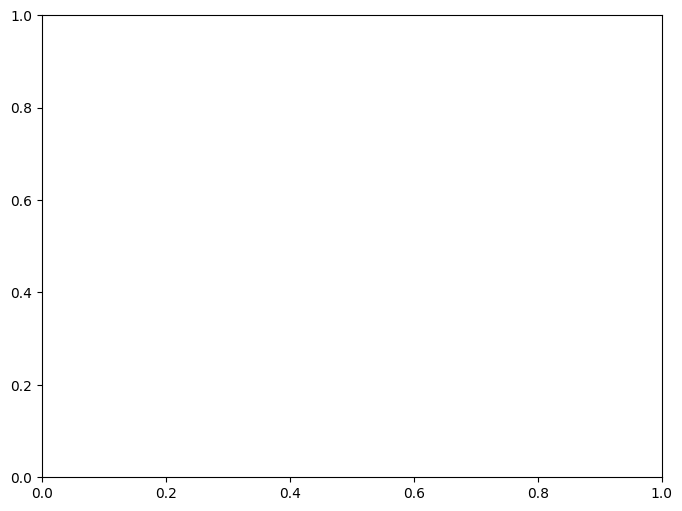

In [ ]:
# 3D scatter plot

# imports Axes3D class (necesary for creating 3D plots using Matplotlib) from the mplot3d module in the mpl_toolkits library
from mpl_toolkits.mplot3d import Axes3D

# 1 - identifier
fig = plt.figure(1, figsize=(8, 6))
plt.clf() # clears any existing content in the current figure to ensure a clean canvas for the new plot

# 3D axis creation
# figure - fig; rect - position of the rectangle within the figure; elev - elevation angle of the view; azim - sets the azimuth angle of the view
# all above control the perspective of the 3D plot
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# clears any existing content on the axes
plt.cla()

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

# labels array - contains cluster assignments for each customer
# astype(np.float64) converts the labels to a data type which is suitable for color mapping.
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float64))

plt.show()

# outcome - plot not showing


#### setting value for k

In [ ]:
# to determine optimal # of clusters "k" for the K-Means algorithm using the "elbow method"

# Initialization

sse = [] # SSE also known as inertia for different values of k. Lower SSE = better clustering

# Iteration through cluster numbers
for k in range(1, 10): #iterates k from 1 to 9; performs k means clustering for each k

    # Performing kmeans
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300) # max_iter = sets the max no. of iterations for the algorithm to converge

    # Fitting the K-Means model
    kmeans.fit(X)

    # Calculating and storing SSE

    # kmeans.inertia_ gives the SSE value for that particular k
    # This SSE value then appended to the sse list
    sse.append(kmeans.inertia_)

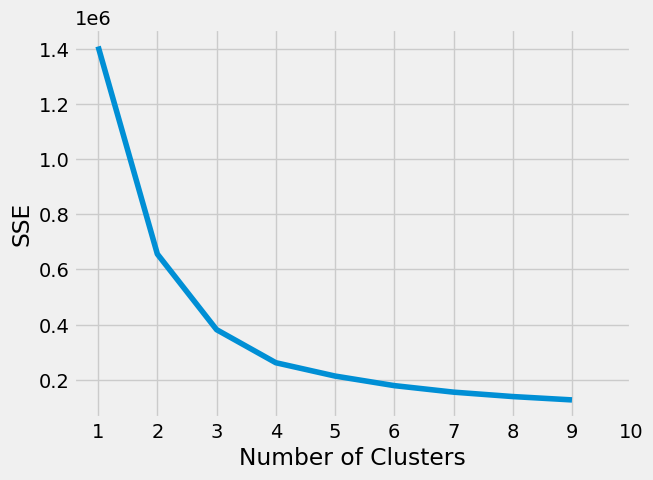

In [ ]:
# Plot for the elbow method

# "Sets the style of the plot to resemble the style used by the website FiveThirtyEight, which is known for its distinctive data visualizations" (Gemini, 2024).
plt.style.use("fivethirtyeight")

# "range(1, 10) generates a sequence of numbers from 1 to 9, representing the different numbers of clusters (k) that were tested. These values are used for the x-axis" (Gemini, 2024).
# "sse is a list that likely contains the Sum of Squared Errors (SSE) for each value of k. SSE measures the total distance between data points and their assigned cluster centers. A lower SSE generally indicates better clustering" (Gemini, 2024).
plt.plot(range(1, 10), sse)

# "This line sets the tick marks on the x-axis to range from 1 to 10. This ensures that the x-axis labels align with the values of k that were tested." (Gemini, 2024)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# In essence, this code is visualizing the relationship between the number of clusters (k) and the SSE. The goal is to find the "elbow point" on the plot – the point where the SSE starts to decrease less rapidly as k increases. This elbow point often represents a good balance between minimizing SSE and avoiding overfitting the data with too many clusters.

In [ ]:
# "Evaluate the quality of the clusters generated by the K-Means algorithm using a metric called the Silhouette Score" (Gemini, 2024).

from sklearn.metrics import silhouette_score, silhouette_samples #both functions

# Initializing a List to Store Scores

silhouette_coefficients = [] #will store for diff. # of clusters

# Iterating though different cluster numbers

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10): # "The loop starts at 2 because the Silhouette Score is not defined for a single cluster" (Gemini, 2024).
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)

    # Calculating and storing the Silhouette Score:

    # "This line calculates the Silhouette Score for the current clustering result. X is the input data, and kmeans.labels_ contains the cluster assignments for each data point" (Gemini, 2024).
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

# "This allows you to compare the scores and potentially identify the optimal number of clusters based on the highest Silhouette Score" (Gemini, 2024).
silhouette_coefficients

# ^range from -1: data pt is likely assigned to the wrong cluster
# 0: data pt is on or very close to the decision boundary b/w 2 neighbouring clusters
# to +1: very well clustered, far away from other clusters, very similar to other points in its own cluster

# output: [0.6857530340991117, >> seems to be the best coefficient (k=2 would be therefore the optimal # of clusters)
# 0.5622416593374175,
# 0.4758599682603492,
# 0.3652457495175145,
# 0.34954074975112126,
# 0.32006731946907335,
# 0.25720456474312964,
# 0.27012235021183406]

[0.6857530340991117,
 0.5622416593374175,
 0.4758599682603492,
 0.3652457495175145,
 0.34954074975112126,
 0.32006731946907335,
 0.25720456474312964,
 0.27012235021183406]

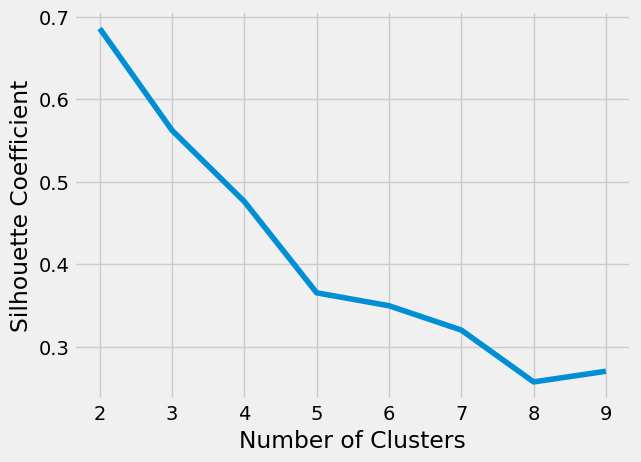

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()